In [2]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import joblib

In [5]:
df=pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


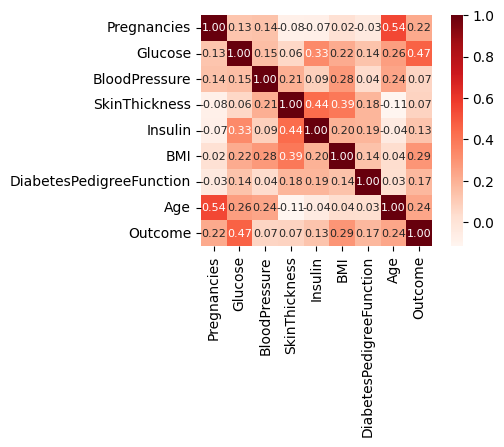

In [6]:
new_dataset=df
new_dataset = new_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
plt.figure(figsize=(5,3))
sns.heatmap(new_dataset.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Reds')
plt.show()

In [8]:
test_case=new_dataset.drop(['Outcome'],axis=1)
y=new_dataset['Outcome']
scaler=StandardScaler()
standardata=scaler.fit_transform(test_case)
x_train,x_test,y_train,y_test=train_test_split(standardata,y,test_size=0.2,random_state=3)

In [9]:
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)
predition=model.predict(x_train)
training=accuracy_score(predition,y_train)

In [10]:
print(training)

0.7736156351791531


In [11]:
predicty=model.predict(x_test)
trainingy=accuracy_score(predicty,y_test)
print(trainingy)

0.7597402597402597


In [12]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'model.pkl')
scaler1 = joblib.load('scaler.pkl')
model1 = joblib.load('model.pkl')